# Conhecendo os dados

In [1]:
import pandas as pd


In [2]:
dados_churn = pd.read_json("dataset-telecon.json")
dados_churn.head()

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."


In [3]:
dados_churn['conta'][0]

{'contrato': None,
 'faturamente_eletronico': None,
 'metodo_pagamento': None,
 'cobranca': {'mensal': None, 'Total': None}}

In [4]:
pd.json_normalize(dados_churn['conta']).head()

,contrato,faturamente_eletronico,metodo_pagamento,cobranca.mensal,cobranca.Total
0,None,None,None,NaN,None
1,mes a mes,nao,cheque pelo correio,59.9,542.4
2,mes a mes,sim,cheque eletronico,73.9,280.85
3,mes a mes,sim,cheque eletronico,98.0,1237.85
4,mes a mes,sim,cheque pelo correio,83.9,267.4


In [5]:
pd.json_normalize(dados_churn['telefone']).head()

,servico_telefone,varias_linhas
0,sim,nao
1,sim,sim
2,sim,nao
3,sim,nao
4,sim,nao


## Transformando dados em uma tabela

In [6]:
import json

In [7]:
with open("dataset-telecon.json") as f:
  json_bruto = json.load(f)

In [8]:
json_bruto

[{'id_cliente': '0002-ORFBO',
  'Churn': 'nao',
  'cliente': {'genero': 'feminino',
   'idoso': 0,
   'parceiro': 'sim',
   'dependentes': 'sim',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'nao'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'sim',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'sim',
   'tv_streaming': 'sim',
   'filmes_streaming': 'nao'},
  'conta': {'contrato': None,
   'faturamente_eletronico': None,
   'metodo_pagamento': None,
   'cobranca': {'mensal': None, 'Total': None}}},
 {'id_cliente': '0003-MKNFE',
  'Churn': 'nao',
  'cliente': {'genero': 'masculino',
   'idoso': 0,
   'parceiro': 'nao',
   'dependentes': 'nao',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'sim'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'nao',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'nao',


In [9]:
dados_normalizados = pd.json_normalize(json_bruto)
dados_normalizados.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [10]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

In [11]:
dados_normalizados [dados_normalizados['conta.cobranca.Total'] == ' '].head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
975,1371-DWPAZ,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cartao de credito (automatico),56.05,
1775,2520-SGTTA,nao,feminino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.00,
1955,2775-SEFEE,nao,masculino,0,nao,sim,0.0,sim,sim,DSL,...,sim,nao,sim,nao,nao,dois anos,sim,transferencia bancaria (automatica),61.90,
2075,2923-ARZLG,nao,masculino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cheque pelo correio,19.70,
2232,3115-CZMZD,nao,masculino,0,nao,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.25,


In [12]:
dados_normalizados [dados_normalizados['conta.cobranca.Total'] == ' '][
    ['cliente.tempo_servico' , 'conta.contrato' , 'conta.cobranca.mensal' , 'conta.cobranca.Total']
]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,dois anos,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


In [13]:
idx = dados_normalizados [dados_normalizados['conta.cobranca.Total'] == ' '].index

In [14]:
dados_normalizados.loc[idx , 'conta.cobranca.Total'] = dados_normalizados.loc[idx , 'conta.cobranca.mensal'] * 24

In [15]:
dados_normalizados.loc[idx , 'conta.tempo_servico'] = 24

In [16]:
dados_normalizados.loc[idx] [ [ 'cliente.tempo_servico' , 'conta.contrato' , 'conta.cobranca.mensal' , 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,1345.2
1775,0.0,dois anos,20.00,480.0
1955,0.0,dois anos,61.90,1485.6
2075,0.0,dois anos,19.70,472.8
2232,0.0,dois anos,20.25,486.0
2308,0.0,dois anos,25.35,608.4
2930,0.0,dois anos,73.35,1760.4
3134,0.0,dois anos,25.75,618.0
3203,0.0,dois anos,52.55,1261.2
4169,0.0,dois anos,80.85,1940.4


In [17]:
dados_normalizados['conta.cobranca.Total'] = dados_normalizados['conta.cobranca.Total'].astype(float)

In [18]:
dados_normalizados.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total,conta.tempo_servico
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,nao,sim,sim,nao,None,None,None,NaN,NaN,NaN
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40,NaN
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85,NaN
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85,NaN
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40,NaN


In [19]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

In [20]:
for col in dados_normalizados.columns:
  print(f'Coluna: {col}')
  print(dados_normalizados[col].unique())
  print('-' * 30)

Coluna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['nao' 'sim' '']
------------------------------
Coluna: cliente.genero
['feminino' 'masculino']
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
['sim' 'nao']
------------------------------
Coluna: cliente.dependentes
['sim' 'nao']
------------------------------
Coluna: cliente.tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3.50e+01 6.40e+01 3.90e+01 4.00e+01 6.00e+00 3.00e+01
 7.00e+01 5.70e+01 5.80e+01 1.60e+01 3.20e+01 3.30e+01 1.00e+01 2.10e+01
 6.10e+01 1.50e+01 4.40e+01 2.20e+01 2.40e+01 1.90e+01

In [21]:
dados_normalizados.query("Churn == ''")

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total,conta.tempo_servico
30,0047-ZHDTW,,feminino,0,nao,nao,11.0,sim,sim,fibra otica,...,nao,nao,nao,nao,mes a mes,sim,transferencia bancaria (automatica),79.00,929.30,NaN
75,0120-YZLQA,,masculino,0,nao,nao,71.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cartao de credito (automatico),19.90,1355.10,NaN
96,0154-QYHJU,,masculino,0,nao,nao,29.0,sim,nao,DSL,...,nao,sim,nao,nao,um ano,sim,cheque eletronico,58.75,1696.20,NaN
98,0162-RZGMZ,,feminino,1,nao,nao,5.0,sim,nao,DSL,...,nao,sim,nao,nao,mes a mes,nao,cartao de credito (automatico),59.90,287.85,NaN
175,0274-VVQOQ,,masculino,1,sim,nao,65.0,sim,sim,fibra otica,...,sim,nao,sim,sim,um ano,sim,transferencia bancaria (automatica),103.15,6792.45,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,9920-GNDMB,,masculino,0,nao,nao,9.0,sim,sim,fibra otica,...,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,76.25,684.85,NaN
7239,9955-RVWSC,,feminino,0,sim,sim,67.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,transferencia bancaria (automatica),19.25,1372.90,NaN
7247,9966-VYRTZ,,feminino,0,sim,sim,31.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,sim,cheque pelo correio,19.55,658.95,NaN
7267,6532-YOHZY,,masculino,0,sim,sim,45.0,sim,sim,fibra otica,...,sim,sim,sim,sim,dois anos,sim,transferencia bancaria (automatica),109.75,4900.65,NaN


In [22]:
dados_sem_vazio = dados_normalizados[dados_normalizados['Churn'] != ''].copy()

In [23]:
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7118 entries, 0 to 7343
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente.genero                 7118 non-null   object 
 3   cliente.idoso                  7118 non-null   int64  
 4   cliente.parceiro               7118 non-null   object 
 5   cliente.dependentes            7118 non-null   object 
 6   cliente.tempo_servico          7110 non-null   float64
 7   telefone.servico_telefone      7118 non-null   object 
 8   telefone.varias_linhas         7118 non-null   object 
 9   internet.servico_internet      7118 non-null   object 
 10  internet.seguranca_online      7118 non-null   object 
 11  internet.backup_online         7118 non-null   object 
 12  internet.protecao_dispositivo  7118 non-null   object

In [24]:
dados_sem_vazio.reset_index(drop=True, inplace=True)

In [25]:
dados_sem_vazio

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total,conta.tempo_servico
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,nao,sim,sim,nao,None,None,None,NaN,NaN,NaN
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40,NaN
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85,NaN
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85,NaN
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25,NaN
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00,NaN
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55,NaN
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25,NaN


In [26]:
dados_sem_vazio.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7113,True
7114,True
7115,True
7116,True


In [27]:
dados_sem_vazio.duplicated().sum()


np.int64(75)

In [28]:
filtro_duplicadas = dados_sem_vazio.duplicated()
filtro_duplicadas

,0
0,False
1,False
2,False
3,False
4,False
...,...
7113,True
7114,True
7115,True
7116,True


In [29]:
dados_sem_vazio[filtro_duplicadas]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total,conta.tempo_servico
7043,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25,NaN
7044,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.50,NaN
7045,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95,NaN
7046,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.40,NaN
7047,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25,NaN
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00,NaN
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55,NaN
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25,NaN


In [30]:
dados_sem_vazio.drop_duplicates(inplace=True)

In [31]:
dados_sem_vazio

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total,conta.tempo_servico
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,nao,sim,sim,nao,None,None,None,NaN,NaN,NaN
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40,NaN
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85,NaN
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85,NaN
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90,NaN
7039,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70,NaN
7040,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75,NaN
7041,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65,NaN


In [32]:
dados_sem_vazio.duplicated().sum()

np.int64(0)

In [33]:
dados_sem_vazio.isna().sum()

,0
id_cliente,0
Churn,0
cliente.genero,0
cliente.idoso,0
cliente.parceiro,0
cliente.dependentes,0
cliente.tempo_servico,8
telefone.servico_telefone,0
telefone.varias_linhas,0
internet.servico_internet,0


In [34]:
dados_sem_vazio.isna().sum().sum()

np.int64(7146)

In [35]:
dados_sem_vazio[dados_sem_vazio.isna().any(axis=1)]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total,conta.tempo_servico
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,nao,sim,sim,nao,None,None,None,NaN,NaN,NaN
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40,NaN
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85,NaN
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85,NaN
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90,NaN
7039,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70,NaN
7040,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75,NaN
7041,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65,NaN


In [36]:
filtro = dados_sem_vazio['cliente.tempo_servico'].isna()

In [37]:
dados_sem_vazio[filtro][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,NaN,90.45,5957.90
176,NaN,29.30,355.90
181,NaN,63.95,318.10
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.80
5273,NaN,20.60,116.60
5276,NaN,73.85,3581.40
6134,NaN,69.05,1958.45


In [38]:
import numpy as np

In [39]:
dados_sem_vazio['cliente.tempo_servico'].fillna(
    np.ceil(
        dados_sem_vazio['conta.cobranca.Total'] / dados_sem_vazio['conta.cobranca.mensal']
    ), inplace=True
)

/tmp/ipython-input-3942568079.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_sem_vazio['cliente.tempo_servico'].fillna(


In [40]:
dados_sem_vazio[filtro][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,66.0,90.45,5957.90
176,13.0,29.30,355.90
181,5.0,63.95,318.10
751,60.0,101.05,5971.25
3523,14.0,76.10,1054.80
5273,6.0,20.60,116.60
5276,49.0,73.85,3581.40
6134,29.0,69.05,1958.45


In [41]:
dados_sem_vazio.isna().sum()

,0
id_cliente,0
Churn,0
cliente.genero,0
cliente.idoso,0
cliente.parceiro,0
cliente.dependentes,0
cliente.tempo_servico,0
telefone.servico_telefone,0
telefone.varias_linhas,0
internet.servico_internet,0


In [42]:
dados_sem_vazio['conta.contrato'].value_counts()

,count
conta.contrato,
mes a mes,3861
dois anos,1688
um ano,1463


In [43]:
coluna_dropar = ['conta.contrato','conta.faturamente_eletronico','conta.metodo_pagamento']

In [44]:
dados_sem_vazio[coluna_dropar].isna().any(axis=1).sum()

np.int64(37)

In [45]:
df_sem_nulos = dados_sem_vazio.dropna(subset=coluna_dropar).copy()
df_sem_nulos.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total,conta.tempo_servico
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40,NaN
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85,NaN
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85,NaN
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40,NaN
5,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45,NaN


In [46]:
df_sem_nulos.reset_index(drop=True, inplace=True)

In [47]:
df_sem_nulos.isna().sum()

,0
id_cliente,0
Churn,0
cliente.genero,0
cliente.idoso,0
cliente.parceiro,0
cliente.dependentes,0
cliente.tempo_servico,0
telefone.servico_telefone,0
telefone.varias_linhas,0
internet.servico_internet,0


In [48]:
import pandas as pd

# Criando um DataFrame de exemplo
df_exercicio = pd.DataFrame({'Produto': ['Camisa', 'Calça', 'Tênis', 'Meia', 'Boné'],
                   'Tamanho': ['P', 'M', 'M', None, None],
                   'Preço': [49.99, 79.99, 199.99, 9.99, 39.99]})

# Preenchendo os valores nulos com a moda
df_exercicio['Tamanho'].fillna(df_exercicio['Tamanho'].mode()[0], inplace=True)
print(df_exercicio)

  Produto Tamanho   Preço
0  Camisa       P   49.99
1   Calça       M   79.99
2   Tênis       M  199.99
3    Meia       M    9.99
4    Boné       M   39.99


/tmp/ipython-input-1455392015.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_exercicio['Tamanho'].fillna(df_exercicio['Tamanho'].mode()[0], inplace=True)


In [49]:
df_sem_nulos.describe()

,cliente.idoso,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total,conta.tempo_servico
count,7006.000000,7006.000000,7006.000000,7006.000000,11.0
mean,0.162004,33.248501,64.720361,2317.743862,24.0
std,0.368481,35.333897,30.084664,2876.919022,0.0
min,0.000000,0.000000,18.250000,18.800000,24.0
25%,0.000000,9.000000,35.450000,402.087500,24.0
50%,0.000000,29.000000,70.300000,1392.925000,24.0
75%,0.000000,56.000000,89.850000,3783.600000,24.0
max,1.000000,1080.000000,118.750000,112212.000000,24.0


In [50]:
import seaborn as sns

<Axes: xlabel='cliente.tempo_servico'>

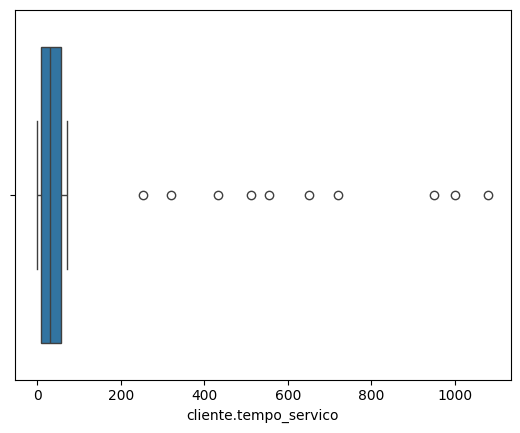

In [51]:
sns.boxplot(x=df_sem_nulos['cliente.tempo_servico'])

In [52]:
Q1 = df_sem_nulos['cliente.tempo_servico'].quantile(0.25)
Q3 = df_sem_nulos['cliente.tempo_servico'].quantile(0.75)
IQR = Q3-Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [53]:
outliers_index = (df_sem_nulos['cliente.tempo_servico']< limite_inferior) | (df_sem_nulos['cliente.tempo_servico']>limite_superior)

In [54]:
df_sem_nulos[outliers_index]['cliente.tempo_servico']

,cliente.tempo_servico
1945,1080.0
1946,1000.0
1952,950.0
1956,254.0
1958,321.0
1963,650.0
1966,721.0
1970,555.0
1973,433.0
1974,512.0


In [55]:
df_sem_out = df_sem_nulos.copy()

In [56]:
df_sem_out[outliers_index]['cliente.tempo_servico']

,cliente.tempo_servico
1945,1080.0
1946,1000.0
1952,950.0
1956,254.0
1958,321.0
1963,650.0
1966,721.0
1970,555.0
1973,433.0
1974,512.0


In [57]:
import numpy as np

In [58]:
df_sem_out.loc[outliers_index, 'cliente.tempo_servico'] = np.ceil(
    df_sem_out.loc[outliers_index, 'conta.cobranca.Total'] /
    df_sem_out.loc[outliers_index, 'conta.cobranca.mensal']
)

<Axes: xlabel='cliente.tempo_servico'>

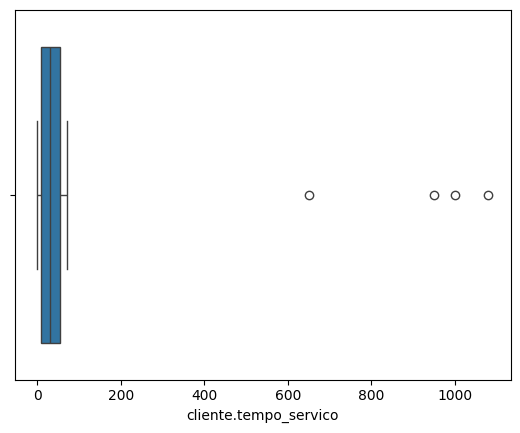

In [59]:
sns.boxplot(x=df_sem_out['cliente.tempo_servico'])

In [60]:
df_sem_out[outliers_index][['cliente.tempo_servico', 'conta.cobranca.Total', 'conta.cobranca.mensal' ]]
#

,cliente.tempo_servico,conta.cobranca.Total,conta.cobranca.mensal
1945,1080.0,112212.00,103.90
1946,1000.0,45900.00,45.90
1952,951.0,79895.00,84.10
1956,2.0,80.35,46.05
1958,43.0,4259.30,99.80
1963,650.0,47450.00,73.00
1966,44.0,3856.75,89.55
1970,7.0,124.40,19.15
1973,4.0,346.20,89.20
1974,1.0,19.55,19.55


In [61]:
df_sem_out[outliers_index]['cliente.tempo_servico']

,cliente.tempo_servico
1945,1080.0
1946,1000.0
1952,951.0
1956,2.0
1958,43.0
1963,650.0
1966,44.0
1970,7.0
1973,4.0
1974,1.0


In [62]:
Q1 = df_sem_out['cliente.tempo_servico'].quantile(0.25)
Q3 = df_sem_out['cliente.tempo_servico'].quantile(0.75)
IQR = Q3-Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers_index = (df_sem_out['cliente.tempo_servico']< limite_inferior) | (df_sem_out['cliente.tempo_servico']>limite_superior)
outliers_index

,cliente.tempo_servico
0,False
1,False
2,False
3,False
4,False
...,...
7001,False
7002,False
7003,False
7004,False


In [63]:
df_sem_out = df_sem_out[~outliers_index]

In [64]:
df_sem_out

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total,conta.tempo_servico
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40,NaN
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85,NaN
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85,NaN
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40,NaN
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90,NaN
7002,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70,NaN
7003,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75,NaN
7004,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65,NaN


In [65]:
df_sem_out.reset_index(drop=True, inplace=True)

<Axes: xlabel='cliente.tempo_servico'>

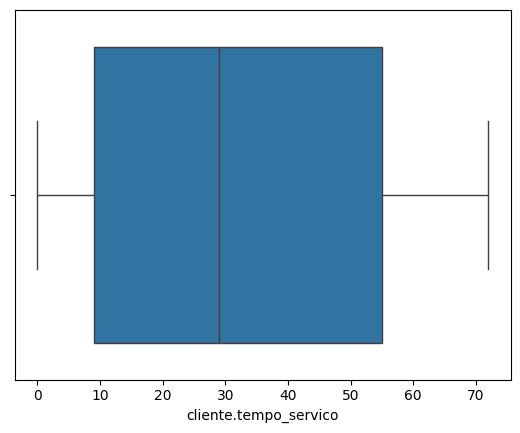

In [66]:
sns.boxplot(x=df_sem_out['cliente.tempo_servico'])

In [67]:
df_sem_out

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total,conta.tempo_servico
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40,NaN
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85,NaN
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85,NaN
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40,NaN
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90,NaN
6998,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70,NaN
6999,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75,NaN
7000,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65,NaN


In [68]:
df_sem_id = df_sem_out.drop('id_cliente', axis=1).copy()
df_sem_id

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,...,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total,conta.tempo_servico
0,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,...,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40,NaN
1,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,...,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85,NaN
2,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,...,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85,NaN
3,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,...,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40,NaN
4,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,nao,...,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,sim,...,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90,NaN
6998,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,nao,...,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70,NaN
6999,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,nao,...,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75,NaN
7000,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,sim,...,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65,NaN


In [69]:
mapeamento = {
    'nao': 0,
    'sim': 1,
    'masculino': 0,
    'feminino': 1
}

In [70]:
for col in df_sem_id.columns:
    print(f"Coluna: {col}")
    print(df_sem_id[col].unique())
    print("-" * 30)

Coluna: Churn
['nao' 'sim']
------------------------------
Coluna: cliente.genero
['masculino' 'feminino']
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
['nao' 'sim']
------------------------------
Coluna: cliente.dependentes
['nao' 'sim']
------------------------------
Coluna: cliente.tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.
  0.]
------------------------------
Coluna: telefone.servico_telefone
['sim' 'nao']
------------------------------
Coluna: telefone.varias_linhas
['sim' 'nao' 'sem servico de telefone']
------------------------------
Coluna: internet.servico_internet
['DSL' 'fibra otica' 'nao']
------------------------------
Coluna: internet.seguranca_

In [71]:
colunas = ['telefone.servico_telefone', 'Churn', 'cliente.parceiro', 'cliente.dependentes', 'conta.faturamente_eletronico', 'cliente.genero']

In [72]:
df_sem_id[colunas] = df_sem_id[colunas].replace(mapeamento)
df_sem_id

/tmp/ipython-input-3392418828.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sem_id[colunas] = df_sem_id[colunas].replace(mapeamento)


,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,...,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total,conta.tempo_servico
0,0,0,0,0,0,9.0,1,sim,DSL,nao,...,nao,nao,nao,sim,mes a mes,0,cheque pelo correio,59.90,542.40,NaN
1,1,0,0,0,0,4.0,1,nao,fibra otica,nao,...,sim,nao,nao,nao,mes a mes,1,cheque eletronico,73.90,280.85,NaN
2,1,0,1,1,0,13.0,1,nao,fibra otica,nao,...,sim,nao,sim,sim,mes a mes,1,cheque eletronico,98.00,1237.85,NaN
3,1,1,1,1,0,3.0,1,nao,fibra otica,nao,...,nao,sim,sim,nao,mes a mes,1,cheque pelo correio,83.90,267.40,NaN
4,0,1,0,0,1,9.0,1,nao,DSL,nao,...,nao,sim,sim,sim,mes a mes,1,cartao de credito (automatico),69.40,571.45,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,1,0,0,0,13.0,1,nao,DSL,sim,...,nao,sim,nao,nao,um ano,0,cheque pelo correio,55.15,742.90,NaN
6998,1,0,0,1,0,22.0,1,sim,fibra otica,nao,...,nao,nao,nao,sim,mes a mes,1,cheque eletronico,85.10,1873.70,NaN
6999,0,0,0,0,0,2.0,1,nao,DSL,nao,...,nao,nao,nao,nao,mes a mes,1,cheque pelo correio,50.30,92.75,NaN
7000,0,0,0,1,1,67.0,1,nao,DSL,sim,...,sim,sim,nao,sim,dois anos,0,cheque pelo correio,67.85,4627.65,NaN


In [73]:
for col in df_sem_id.columns:
    print(f"Coluna: {col}")
    print(df_sem_id[col].unique())
    print("-" * 30)

Coluna: Churn
[0 1]
------------------------------
Coluna: cliente.genero
[0 1]
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
[0 1]
------------------------------
Coluna: cliente.dependentes
[0 1]
------------------------------
Coluna: cliente.tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.
  0.]
------------------------------
Coluna: telefone.servico_telefone
[1 0]
------------------------------
Coluna: telefone.varias_linhas
['sim' 'nao' 'sem servico de telefone']
------------------------------
Coluna: internet.servico_internet
['DSL' 'fibra otica' 'nao']
------------------------------
Coluna: internet.seguranca_online
['nao' 'sim' 'sem servico de internet']
----

In [74]:
s = pd.Series(list('abca'))
s

,0
0,a
1,b
2,c
3,a


In [75]:
pd.get_dummies(s)

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False


In [76]:
df_dummies = pd.get_dummies(df_sem_id, dtype=int)

In [77]:
df_dummies.columns

Index(['Churn', 'cliente.genero', 'cliente.idoso', 'cliente.parceiro',
       'cliente.dependentes', 'cliente.tempo_servico',
       'telefone.servico_telefone', 'conta.faturamente_eletronico',
       'conta.cobranca.mensal', 'conta.cobranca.Total', 'conta.tempo_servico',
       'telefone.varias_linhas_nao',
       'telefone.varias_linhas_sem servico de telefone',
       'telefone.varias_linhas_sim', 'internet.servico_internet_DSL',
       'internet.servico_internet_fibra otica',
       'internet.servico_internet_nao', 'internet.seguranca_online_nao',
       'internet.seguranca_online_sem servico de internet',
       'internet.seguranca_online_sim', 'internet.backup_online_nao',
       'internet.backup_online_sem servico de internet',
       'internet.backup_online_sim', 'internet.protecao_dispositivo_nao',
       'internet.protecao_dispositivo_sem servico de internet',
       'internet.protecao_dispositivo_sim', 'internet.suporte_tecnico_nao',
       'internet.suporte_tecnico_sem serv

In [78]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 42 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Churn                                                       7002 non-null   int64  
 1   cliente.genero                                              7002 non-null   int64  
 2   cliente.idoso                                               7002 non-null   int64  
 3   cliente.parceiro                                            7002 non-null   int64  
 4   cliente.dependentes                                         7002 non-null   int64  
 5   cliente.tempo_servico                                       7002 non-null   float64
 6   telefone.servico_telefone                                   7002 non-null   int64  
 7   conta.faturamente_eletronico                                7002 non-null   int64  
 8 